Visualizations for InsuranceCharges and predicted outcomes from ML model

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load

In [10]:
load_model = load('LinearRegressionTunedJoblib.model')

In [11]:
df = pd.read_csv('database_insurance.csv')
df

,AgeLabel,SexLabel,BMI,ChildrenLabel,RegionLabel,ChargeValue,SmokerLabel_True
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0
1334,18,female,31.920,0,northeast,2205.98080,0
1335,18,female,36.850,0,southeast,1629.83350,0
1336,21,female,25.800,0,southwest,2007.94500,0


In [12]:
df = df.drop(columns = 'SexLabel')
df

,AgeLabel,BMI,ChildrenLabel,RegionLabel,ChargeValue,SmokerLabel_True
0,19,27.900,0,southwest,16884.92400,1
1,18,33.770,1,southeast,1725.55230,0
2,28,33.000,3,southeast,4449.46200,0
3,33,22.705,0,northwest,21984.47061,0
4,32,28.880,0,northwest,3866.85520,0
...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0
1334,18,31.920,0,northeast,2205.98080,0
1335,18,36.850,0,southeast,1629.83350,0
1336,21,25.800,0,southwest,2007.94500,0


In [14]:
df_dummies = pd.get_dummies(df, columns = ['RegionLabel'], drop_first = True)
df_dummies

,AgeLabel,BMI,ChildrenLabel,ChargeValue,RegionLabel_northwest,RegionLabel_southeast,RegionLabel_southwest,SmokerLabel_True_1
0,19,27.900,0,16884.92400,0,0,1,1
1,18,33.770,1,1725.55230,0,1,0,0
2,28,33.000,3,4449.46200,0,1,0,0
3,33,22.705,0,21984.47061,1,0,0,0
4,32,28.880,0,3866.85520,1,0,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,1,0


In [6]:
X = df_dummies.drop(columns = 'ChargeValue').copy()
y = df_dummies[['ChargeValue']].copy()

In [7]:
charge_predictions = load_model.predict(X)

C:\Users\Christian\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


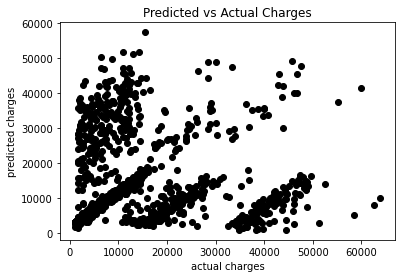

In [8]:
# Plot outputs
plt.scatter(y, charge_predictions, color="black")

#plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.title('Predicted vs Actual Charges')

plt.show()

In [ ]:
#Categorical Values
smoker_labels = list(df['SmokerLabel'])
region_labels = list(df['RegionLabel'])

#Numerical Values
age_labels = list(df['AgeLabel'])
bmi = list(df['BMI'])
children = list(df['ChildrenLabel'])
charge = list(df['ChargeValue'])